<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/SF_movies_visualization_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite
#日本語フォントのインストール　（wordcloudなどで可視化するため）
!apt-get -y install fonts-ipafont-gothic

!pip install neologdn 
#半角を全角に変換
!pip install mojimoji

     |████████████████████████████████| 4.1MB 3.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=788bb9c93df76191aadf0c0ba4b6c893b4fe5eaacddf4831062b609c32ad2199
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.1

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns 


In [78]:
path = "/content/drive/My Drive/movie_research/review_csv/SF_data.csv"
data = pd.read_csv(path) 

In [79]:
#数値カラムに変換する
def prepro(df, col):
  df = df.copy() 
  df[col] = df[col].replace('-','-1') #回答してない人を-1で埋める
  df[col] = df[col].astype(float)

  return df

In [80]:
def round_score(df):
  df["score"] = df["score"]*2.0
  df["score"] = df["score"].round() / 2.0

  return df

In [81]:
data = prepro(data, "score")

data = data[data["score"] != -1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


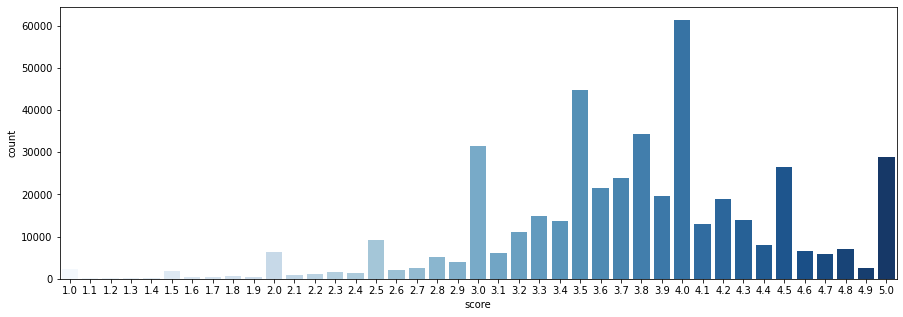

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(data["score"].sort_values(), palette='Blues')

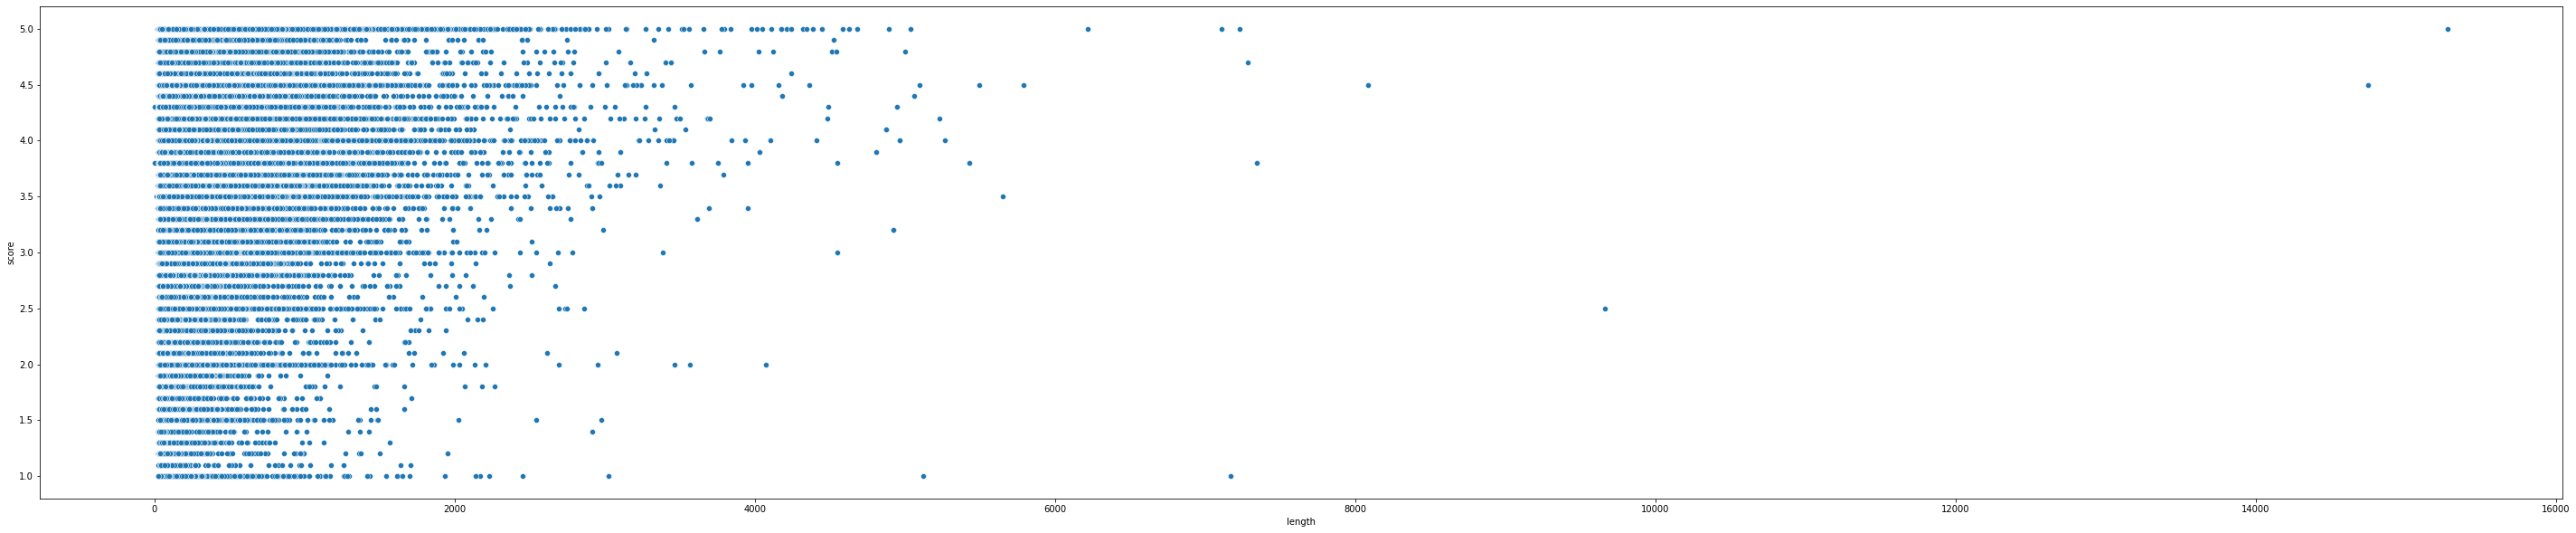

In [83]:
#文字数を可視化
data["length"] = data["review"].apply(lambda x: len(x))
plt.figure(figsize=(50, 10))
sns.scatterplot(y=data["score"].sort_values(), x=data["length"], palette='YlOrBr')

In [84]:
data.query('500 > length > 100').__len__() 

192658

In [85]:
data.query('100 > length > 10').__len__() 

240159

In [86]:
data.query('10 >= length').__len__() 

2

In [87]:
#レビューが書かれていないのもある
data.query('10 >= length')

,title,name,time,review,score,URL,length
56933,インセプション|Inception,TomotsuguKimuraの感想・評価,2017/01/22 02:46,,4.3,https://filmarks.com//movies/5603?page=1115,1
475448,第9地区|District 9,RikoFujiharaの感想・評価,2020/05/31 01:14,,3.8,https://filmarks.com//movies/31424?page=11,1


In [88]:
data.query('20 >= length > 10')

,title,name,time,review,score,URL,length
61617,インセプション|Inception,YangYangの感想・評価,2020/03/04 09:15,こっこれは、、、、、、、、本物の天才,5.0,https://filmarks.com//movies/5603?page=337,18
129130,ガタカ|Gattaca,MK666の感想・評価,2016/08/29 21:16,心打たれた…。PS.ドクターにいいね💗,5.0,https://filmarks.com//movies/6491?page=643,19
178460,スター・トレック|Star Trek,Katsuyaの感想・評価,2019/01/26 19:02,・・・俺、、、スターウォーズ派,3.5,https://filmarks.com//movies/29806?page=48,15


In [89]:
data.query('30 >= length > 20')

,title,name,time,review,score,URL,length
81,12モンキーズ|Twelve Monkeys,mentaikosanの感想・評価,2019/06/29 20:42,ストーリー展開が面白いだけでなく、曲も良い。ので4.0です。,4.0,https://filmarks.com//movies/12268?page=106,30
147,12モンキーズ|Twelve Monkeys,流れ星ジョウの感想・評価,2019/05/28 21:33,ギリアムの作品はどれも好きですが、この作品が一番好きかなあ。,3.7,https://filmarks.com//movies/12268?page=111,30
155,12モンキーズ|Twelve Monkeys,TomohikoNoguchiの感想・評価,2019/05/16 14:07,おおおおおおお、独特な世界観で最後まで楽しませてくれました。,4.0,https://filmarks.com//movies/12268?page=112,30
199,12モンキーズ|Twelve Monkeys,タカヒロの感想・評価,2019/04/14 00:31,構成良くできてるー！世界観も好きブラピの演技がエクセレント,4.3,https://filmarks.com//movies/12268?page=116,29
252,12モンキーズ|Twelve Monkeys,はるの感想・評価,2019/03/09 15:29,過去見。分かりずらかったが、ブラピを見れるだけで面白かった。,4.0,https://filmarks.com//movies/12268?page=121,30
...,...,...,...,...,...,...,...
483861,遊星からの物体X ファーストコンタクト|The Thing,Genkiの感想・評価,2018/06/27 15:53,前作があるの知らずに見てしまいましためっちゃ怖くて最高でした,3.5,https://filmarks.com//movies/28839?page=82,30
483936,遊星からの物体X ファーストコンタクト|The Thing,ろろろみの感想・評価,2020/06/17 08:45,面白かった！でも誰が生きてて誰が死んだのかわからなくなった！,3.3,https://filmarks.com//movies/28839?page=9,30
483981,遊星からの物体X ファーストコンタクト|The Thing,warskkの感想・評価,2017/09/29 01:23,ただ単に化け物とバトルするだけの映画。ひねりがほしかった。,2.3,https://filmarks.com//movies/28839?page=93,29
484242,魔界探偵ゴーゴリII 魔女の呪いと妖怪ヴィーの召喚|Gogol. Viy,よしの感想・評価,2019/12/07 23:07,連続殺人事件の謎登場人物が多すぎてよく分からなくなってきた。,3.1,https://filmarks.com//movies/85125?page=7,30


In [106]:
import neologdn 
import string 
import mojimoji 
import re 

def text_preprocess(text):

  text = neologdn.normalize(text)
  #URLを除去する
  text = re.sub(
      r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?', 
      "",
      text)
  #全角から半角に
  text = mojimoji.zen_to_han(text) 

  #3D,2Dを残したい
  text = text.replace('3D','三次元')
  text = text.replace('2D','二次元')

  #数字をすべて0に置換 
  text = re.sub(r'\d+', '0', text)
  text = re.sub(r'[0]+', '0', text)

  #string.punctuationの除去
  table = str.maketrans('', '', string.punctuation)
  text = text.translate(table) 

  text = text.replace("｡",'')
  text = text.replace("。",'')
  text = text.replace("，",'')
  text = text.replace(",",'')
  text = text.replace("、",'')
  text = text.replace("､",'')
  text = text.replace("…",'')
  text = text.replace("･",'')
  

  # 【】の除去
  text = re.sub(r'[【】]', '', text)
  # （）の除去
  text = re.sub(r'[（）()]', '', text)
  # ［］の除去
  text = re.sub(r'[［］\[\]]', '', text)
  #アルファベットをの大文字を小文字に変換
  text = text.lower()

  #改行コードの除去
  text = text.replace('\n', '')
  text = text.replace('\r\n','')
  
  #空白を除去
  #全角スペース
  text = text.replace('\u3000','')
  #タブキー
  text = text.replace('\t','')
  #半角
  #text = re.sub(r' ','', text) →英字幕などの指摘もあるため後で行う
  
  return text

In [107]:
!pip install emoji 
!pip install nagisa 
#!pip install unicodedata 

import emoji
import nagisa

def delete_emoji(text):
  target_list = [w for w in text if w in emoji.UNICODE_EMOJI]
  for trg in target_list:
    text = text.replace(trg, "")
  return text 

In [108]:
data["review"] = data["review"].apply(text_preprocess) 
data["review"] = data["review"].apply(delete_emoji)

In [109]:
data["length"] = data["review"].apply(lambda x: len(x))

In [110]:
pd.set_option('display.max_rows', 50)

In [111]:
print("10文字以下のアカウント数 : {}".format(data.query("length < 10").__len__()))
data.query('length < 10').sample(10)

10文字以下のアカウント数 : 275


,title,name,time,review,score,URL,length
96281,エイリアンVS. プレデター|AVP: Alien vs. Predator,YOの感想・評価,2019/10/27 12:29,,3.5,https://filmarks.com//movies/27038?page=14,0
157276,ザ・トランスフォーム|Hornet,mash1966の感想・評価,2019/03/26 19:25,,1.5,https://filmarks.com//movies/83465?page=2,0
323880,ブレードランナー 2049|Blade Runner 2049,satoshimurakamiの感想・評価,2017/11/12 00:07,,4.8,https://filmarks.com//movies/67862?page=579,0
312083,ブラックパンサー|Black Panther,みつの感想・評価,2018/03/22 02:07,,3.8,https://filmarks.com//movies/60411?page=845,0
424587,レディ・プレイヤー1|Ready Player One,YOの感想・評価,2019/09/26 17:06,,4.0,https://filmarks.com//movies/63747?page=404,0
331381,プロトタイプ・マナ 制御不能|Ctrl Alt Delete／Hacked,mash1966の感想・評価,2019/05/05 20:21,,1.5,https://filmarks.com//movies/83382?page=1,0
451684,時をかける少女|,MA2の感想・評価,2016/08/07 16:29,0️,4.0,https://filmarks.com//movies/20079?page=123,2
331968,プロメテウス|Prometheus,骨法十か条の感想・評価,2017/05/31 11:09,,4.0,https://filmarks.com//movies/30187?page=151,0
162495,ジュピター|Jupiter Ascending,アイダの感想・評価,2018/09/22 23:52,,2.5,https://filmarks.com//movies/56886?page=40,0
191312,ゼロ・グラビティ|Gravity,とぅーの感想・評価,2015/10/27 12:18,0 imax三次元,4.2,https://filmarks.com//movies/54693?page=705,9


前処理した結果，レビュー情報が消えてしまうアカウントが結構あることが分かる

In [115]:
print("1文字以上10文字以下のアカウント数 : {}".format(data.query("length < 10").__len__()))
data.query("10 > length > 1").sample(50)                                    

1文字以上10文字以下のアカウント数 : 275


,title,name,time,review,score,URL,length
86803,インデペンデンス・デイ|Independence Day,クロの感想・評価,2017/11/23 22:09,0tv 0dvd0,4.0,https://filmarks.com//movies/17728?page=112,9
381453,メッセージ|Arrival,あぺの感想・評価,2017/11/23 08:37,あと0秒,3.7,https://filmarks.com//movies/64759?page=697,4
137453,ガーディアンズ・オブ・ギャラクシー：リミックス|Guardians of the Galax...,たかのめの感想・評価,2017/06/09 01:49,0回目0回目0,3.6,https://filmarks.com//movies/59603?page=748,7
204344,ターミネーター2|Terminator 2: Judgment Day,みーるナイトレイの感想・評価,2017/08/23 21:53,面白ｯ以上です,4.0,https://filmarks.com//movies/33388?page=299,7
299267,フィフス・エレメント|The Fifth Element,Naokaの感想・評価,2016/08/25 16:25,起床転結,2.3,https://filmarks.com//movies/19037?page=222,4
277593,バック・トゥ・ザ・フューチャーPART3|Back to the Future Part III,麻友の感想・評価,2020/02/02 21:55,0 ☆0 ☆0字幕,3.6,https://filmarks.com//movies/6890?page=273,9
118613,オール・ユー・ニード・イズ・キル|Edge of Tomorrow,Filmarksの感想・評価,2018/08/24 14:54,宇多丸,3.5,https://filmarks.com//movies/56554?page=222,3
346520,マッドマックス 怒りのデス・ロード|Mad Max: Fury Road,安部青いの感想・評価,2016/08/26 08:00,ｻｲｺｰｲｪｰｲ,5.0,https://filmarks.com//movies/56770?page=797,8
65643,インセプション|Inception,ふじうの感想・評価,2020/08/26 23:08,0度目の鑑賞,5.0,https://filmarks.com//movies/5603?page=7,6
14662,A.I.|Artificial Intelligence: AI,さとの感想・評価,2018/08/13 23:49,悲しいお話記録,3.7,https://filmarks.com//movies/18361?page=185,7


In [116]:
pd.set_option('display.max_rows', 50)
min_ = 10
max_ = 20
print("{}文字以上{}文字以下のアカウント数 : {}".format(min_,max_,data[ (data.length > min_ ) & (data.length < max_) ].__len__()))
data[ (data.length > min_ ) & (data.length < max_) ].tail(50)

10文字以上20文字以下のアカウント数 : 439


,title,name,time,review,score,URL,length
424743,レディ・プレイヤー1|Ready Player One,Minamiの感想・評価,2019/09/03 15:32,0回目0 0 0作目吹き替え,5.0,https://filmarks.com//movies/63747?page=419,14
424785,レディ・プレイヤー1|Ready Player One,神城悠の感想・評価,2019/08/31 00:04,脚本0演出0好み0演者0映像0合計0点,3.5,https://filmarks.com//movies/63747?page=422,19
425508,レディ・プレイヤー1|Ready Player One,ユナの感想・評価,2019/06/11 18:48,三次元で見たかったちょうたのしいです,3.8,https://filmarks.com//movies/63747?page=488,18
429893,レディ・プレイヤー1|Ready Player One,まきしの感想・評価,2018/10/25 04:23,0 dvd0 netflix 0作品目,3.5,https://filmarks.com//movies/63747?page=883,19
431300,レプリカズ|REPLICAS,reusの感想・評価,2020/04/26 22:28,ｷｱﾇはsfが好きなんだねでｴﾄﾞは0,3.3,https://filmarks.com//movies/76720?page=20,19
432115,レベル16 服従の少女たち|Level 16,Kotoの感想・評価,2020/08/17 18:16,0かわいい上に迫真の演技凄い少女たち,3.7,https://filmarks.com//movies/83512?page=17,18
432296,レベル16 服従の少女たち|Level 16,TakejirouNakamaの感想・評価,2020/03/07 21:27,0 0観賞女の子たちはみなｶﾜﾕｲが,3.0,https://filmarks.com//movies/83512?page=33,18
433948,ロボコップ|RoboCop,KAZMAXの感想・評価,2015/07/16 01:08,私の青春が復活しました時間を返してくれ,2.0,https://filmarks.com//movies/55902?page=76,19
434369,ワールズ・エンド 酔っぱらいが世界を救う！|The World's End,EVILQUEENの感想・評価,2018/12/06 20:00,おおえっええｰんｰ⁇⁇はｰ⁇でした,3.5,https://filmarks.com//movies/55362?page=109,17
435025,ワールズ・エンド 酔っぱらいが世界を救う！|The World's End,yoshiking9062の感想・評価,2016/11/21 23:48,0 bluelayはやっぱりｱﾎだ,2.7,https://filmarks.com//movies/55362?page=168,17


重複ある.★だけのコメントもある．コメントも結構あいまいあなのも多く含まれている. 顔文字の削除がまだできていない.

In [114]:
print('重複削除前:',len(data))
print('重複削除後:',len(data.drop_duplicates(keep='first')))

print('削除された数:',len(data)-len(data.drop_duplicates(keep='first')))

重複削除前: 455531
重複削除後: 439854
削除された数: 15677


重複の原因はわからないけど結構重複してたんだな

In [124]:
def extra_preprocess(text):
  text = text.replace('☆', '')
  text = text.replace('『', '')
  text = text.replace('』', '')
  text = text.replace('〈', '')
  text = text.replace('〉', '')
  text = text.replace('【', '')
  text = text.replace('】', '')
  text = text.replace('『','')
  text = text.replace('』','')
  return text 

In [119]:
def pipeline(path):
  data = pd.read_csv(path)
  #重複の削除
  data = data.drop_duplicates(keep='first') 

  #数値カラムに変換
  data = prepro(data, "score") 
  
  #preprocessing to text
  data["review"] = data["review"].apply(text_preprocess) 
  data["review"] = data["review"].apply(delete_emoji)
  #df["review"] = df["review"].apply(extra_preprocess)

  data["length"] = data["review"].apply(lambda x: len(x))
  #ノーコメントの削除
  data = data[data["length"]>1]
  
  return data

In [120]:
data = pipeline(path)

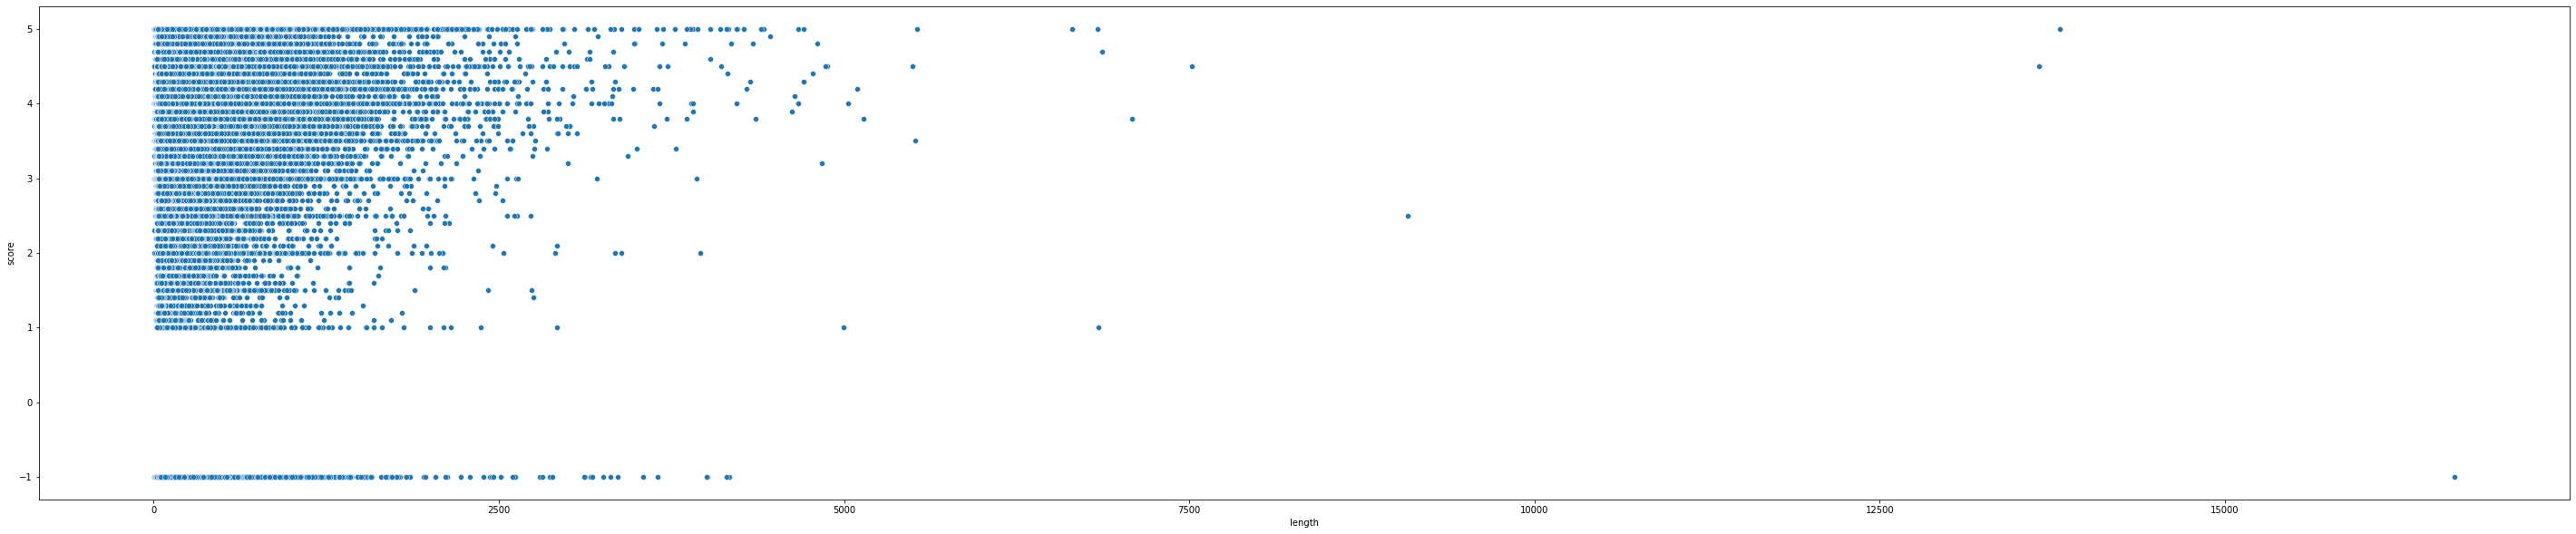

In [121]:
#文字数を可視化
data["length"] = data["review"].apply(lambda x: len(x))
plt.figure(figsize=(50, 10))
sns.scatterplot(y=data["score"].sort_values(), x=data["length"], palette='mako')

In [126]:
data["review"] = data["review"].apply(extra_preprocess)
data

,title,name,time,review,score,URL,length
0,12モンキーズ|Twelve Monkeys,ブタブタの感想・評価,2020/08/27 22:57,久々に再鑑賞ﾗｼﾞｭﾃが原案て言うか原作で更に0ﾓﾝｷｰｽﾞはﾃﾈｯﾄの元ﾈﾀなんじゃと話し...,4.5,https://filmarks.com//movies/12268?page=1,467
1,12モンキーズ|Twelve Monkeys,いーむろの感想・評価,2020/08/26 21:13,ﾊﾟﾝﾃﾞﾐｯｸものですがﾀｲﾑﾄﾗﾍﾞﾙ映画です主人公が見る夢の真相が次第に明らかになりま...,3.1,https://filmarks.com//movies/12268?page=1,91
2,12モンキーズ|Twelve Monkeys,ちんさくの感想・評価,2020/08/26 19:06,先日見ましたなかなか面白かったです監督のｾﾝｽの良さが光っておりどのｼｰﾝも楽しめ自然と集中...,3.8,https://filmarks.com//movies/12268?page=1,191
3,12モンキーズ|Twelve Monkeys,宇宙弟兄の感想・評価,2020/08/26 15:59,直接的な風刺もいいな音楽が素晴らしいのと登場人物たちの演技がうま過ぎる舞台演劇のようだった,3.8,https://filmarks.com//movies/12268?page=1,45
4,12モンキーズ|Twelve Monkeys,ナンダマの感想・評価,2020/08/24 23:02,映画の種類も好きだけど何故か単調に感じた主人公が正しいのか妄想の中にいるのか分からないﾊﾗﾊ...,3.7,https://filmarks.com//movies/12268?page=1,99
...,...,...,...,...,...,...,...
484298,ＵＦＯ －オヘアの未確認飛行物体－|UFO,にゃおの感想・評価,2018/12/29 23:22,ｵｶﾙﾄ大好きなのでﾄﾞｽﾄﾗｲｸ笑0年ｱﾒﾘｶで実際に起こったufo目撃と電波障害それに関...,5.0,https://filmarks.com//movies/81621?page=5,308
484299,ＵＦＯ －オヘアの未確認飛行物体－|UFO,seriFilの感想・評価,2018/12/27 03:29,主人公友人の男の子と女の子それから教授の女性全員顔のｸｾが独特で良かった,3.0,https://filmarks.com//movies/81621?page=5,36
484300,ＵＦＯ －オヘアの未確認飛行物体－|UFO,barneyの感想・評価,2018/12/27 01:11,内なるsfｵﾀｸの知的探求心を焙り出す隠れた傑作まだﾚﾋﾞｭｰがかなり少ないですね鑑賞する手...,4.5,https://filmarks.com//movies/81621?page=5,474
484301,ＵＦＯ －オヘアの未確認飛行物体－|UFO,SeikiOdaniの感想・評価,2018/12/17 00:48,どんだけ直球なﾀｲﾄﾙやねんとありがちなｵｶﾙﾄ的ｱﾌﾟﾛｰﾁなｴｲﾘｱﾝものかと想像するも...,4.0,https://filmarks.com//movies/81621?page=5,237


#スコアを0.5刻みにする

In [127]:
data = round_score(data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


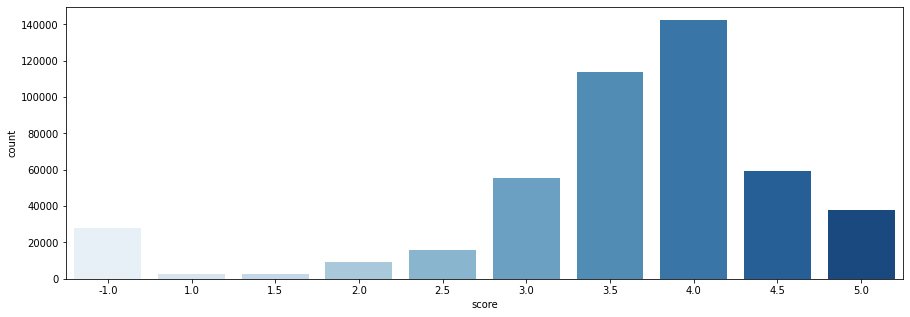

In [128]:
plt.figure(figsize=(15, 5))
sns.countplot(data["score"].sort_values(), palette='Blues')